.. _colors:

# Colors

Color choices are critical in visualization because good color choices can reveal or emphasize patterns in your data while poor choices will obscure them.  This section of the user guide will introduce Toyplot's basic functionality for creating and manipulating colors.  See :ref:`color-mapping` for details on how to represent your data using color.

## Color Values

Colors in Toyplot are represented as red-green-blue-alpha (RGBA) tuples, where each component can range from zero (off) to one (full strength).  Alpha is used to represent the opacity of a color, from zero (completely transparent) to one (completely opaque).  There are a variety of functions in Toyplot for creating color tuples using CSS strings, RGBA data, and even other color spaces:

In [1]:
import toyplot.color
toyplot.color.rgb(1, 0, 0)

array((1.0, 0.0, 0.0, 1.0), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

In [2]:
# Note: transparent red is *not* the same as opaque pink!
toyplot.color.rgba(1, 0, 0, 0.5)

array((1.0, 0.0, 0.0, 0.5), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

In [3]:
toyplot.color.css("mediumseagreen")

array((0.23529411764705882, 0.7019607843137254, 0.44313725490196076, 1.0), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

In [4]:
toyplot.color.css("#248")

array((0.13333333333333333, 0.26666666666666666, 0.5333333333333333, 1.0), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

In [5]:
# CIE Lab color space
toyplot.color.lab(75, 0, -100)

array((0.0, 0.7534751798165635, 1.459151561297241, 1.0), 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

## Color Palettes

In practice you should rarely need to manipulate individual color values as much of the color management in Toyplot centers around :class:`palette <toyplot.color.Palette>` objects, which store ordered collections of colors.  For example, consider Toyplot's default palette:

In [6]:
toyplot.color.Palette()

You will likely recognize the colors in the default palette, since they are used to specify per-series colors when adding multiple data series to a figure.  Although you can create your own custom palettes by passing a sequence of color values to the :class:`toyplot.color.Palette` constructor, we strongly recommend that you use the high-quality palettes from [Color Brewer](http://colorbrewer2.org) which are included with Toyplot and ideal for visualization. As we will see shortly, the Toyplot default palette is itself an example of a Color Brewer palette.

Each of the Color Brewer palettes is assigned to one of three categories, "sequential", "diverging", or "qualitative", which we will discuss in-turn:

### Color Brewer Sequential Palettes

Sequential color palettes are designed to visualize magnitudes for some quantity of interest.  Colors at one end of the palette are mapped to low values and colors at the opposite end map to high values.  Toyplot includes the complete set of Color Brewer sequential palettes, ordered so that colormaps based on these palettes always map low values to low luminance and high values to high luminance:

In [7]:
import IPython.display
for name, palette in toyplot.color.brewer.palettes("sequential"):
    IPython.display.display_html(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(palette)

BlueGreen

BlueGreenYellow

BluePurple

Blues

BrownOrangeYellow

GreenBlue

GreenBluePurple

GreenYellow

Greens

Greys

Oranges

PurpleBlue

PurpleRed

Purples

RedOrange

RedOrangeYellow

RedPurple

Reds

### Color Brewer Diverging Palettes

Diverging palettes are especially useful when visualizing signed magnitudes, or magnitudes relative to some well-defined reference point, such as a mean, median, or domain-specific critical value.  Once again, Toyplot includes the complete set of Color Brewer diverging palettes, ordered consistent so that low/negative values map to cooler colors and high/positive values map to warmer colors:

In [8]:
for name, palette in toyplot.color.brewer.palettes("diverging"):
    IPython.display.display_html(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(palette)

BlueGreenBrown

BlueRed

BlueYellowRed

GrayRed

GreenYellowRed

PinkGreen

PurpleGreen

PurpleOrange

Spectral

### Color Brewer Qualitative (Categorical) Palettes

Qualitative or categorical palettes are designed for visualizing unordered information.  Adjacent colors typically have high contrast in hue or luminance, to emphasize boundaries between values.  Toyplot includes the full set of qualitative palettes from Color Brewer, without modification:

In [9]:
for name, palette in toyplot.color.brewer.palettes("qualitative"):
    IPython.display.display_html(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(palette)

Accent

Dark2

Paired

Pastel1

Pastel2

Set1

Set2

Set3

### Usage

Color brewer palettes are created by name.  For example, the following is the equivalent of Toyplot's default palette:

In [10]:
toyplot.color.brewer.palette("Set2")

And here is a palette that is commonly used for diverging data:

In [11]:
toyplot.color.brewer.palette("BlueRed")

You can lookup the set of all available palette names:

In [12]:
toyplot.color.brewer.names()

['Accent',
 'BlueGreen',
 'BlueGreenBrown',
 'BlueGreenYellow',
 'BluePurple',
 'BlueRed',
 'BlueYellowRed',
 'Blues',
 'BrownOrangeYellow',
 'Dark2',
 'GrayRed',
 'GreenBlue',
 'GreenBluePurple',
 'GreenYellow',
 'GreenYellowRed',
 'Greens',
 'Greys',
 'Oranges',
 'Paired',
 'Pastel1',
 'Pastel2',
 'PinkGreen',
 'PurpleBlue',
 'PurpleGreen',
 'PurpleOrange',
 'PurpleRed',
 'Purples',
 'RedOrange',
 'RedOrangeYellow',
 'RedPurple',
 'Reds',
 'Set1',
 'Set2',
 'Set3',
 'Spectral']

Or you can lookup names for a specific category:

In [13]:
toyplot.color.brewer.names("diverging")

['BlueGreenBrown',
 'BlueRed',
 'BlueYellowRed',
 'GrayRed',
 'GreenYellowRed',
 'PinkGreen',
 'PurpleGreen',
 'PurpleOrange',
 'Spectral']

Alternatively, given a palette name, you can lookup its category:

In [14]:
toyplot.color.brewer.category("BlueRed")

'diverging'

When creating a palette, you can reverse the order of its color values (though this should almost never be necessary, thanks to the careful ordering of the palettes):

In [15]:
toyplot.color.brewer.palette("BlueRed", reverse=True)

Each of the Color Brewer palettes comes in multiple variants with different numbers of colors.  By default, when you create a Color Brewer palette, the one with the maximum number of colors is returned.  However, you can query for all of the available variants, and request one with fewer colors if necessary:

In [16]:
toyplot.color.brewer.counts("BlueRed")

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [17]:
toyplot.color.brewer.palette("BlueRed", count=5)

### Palette Manipulation

Sometimes you'll find yourself needing categorical palettes with more categories than the existing Color Brewer palettes provide.  For these cases, you'll have to create larger palettes on your own, but Toyplot can still help.  First, the :func:`toyplot.color.spread` function can create a family of colors based on a single color value:

In [18]:
toyplot.color.spread("mediumseagreen", lightness=0.9)

In [19]:
toyplot.color.spread(toyplot.color.rgb(1, 0.8, .05), lightness=0.2, count=6)

Of course, this isn't a complete solution, because you can only create so many colors of a single hue before they become indistinguishable.  However, Toyplot makes it easy to concatenate palettes:

In [20]:
toyplot.color.spread("steelblue", count=6) + toyplot.color.spread("crimson", count=5)

Using this approach, you can, within reason, build-up arbitrarily large palettes.  Often, the two-level hierarchy created by the combination of palette hues and lightness is useful for visually grouping families of related categories.

## Color Maps

While palettes group together related collections of color values, Toyplot uses *color maps* to perform the real work of mapping data values to colors. Some color maps are based on the colors contained in a palette, while others calculate color values based on the subtleties of the human visual cortex; regardless, all color maps perform the basic function of mapping a collection of scalar values to a collection of colors.

### Categorical Color Maps

The simplest type of color map in Toyplot is a :class:`toyplot.color.CategoricalMap`, which uses scalar values as an index to lookup color values from a palette.  As you might have guessed, if you create a default categorical map, it uses Toyplot's default palette:

In [21]:
toyplot.color.CategoricalMap()

However, you can create a categorical map explicitly using any palette:

In [22]:
toyplot.color.CategoricalMap(toyplot.color.brewer.palette("Set1"))

As a convenience, :meth:`toyplot.color.BrewerFactory.map` can be used to create a map from any categorical Color Brewer palette:

In [23]:
toyplot.color.brewer.map("Set1")

Although a palette contains a finite number of colors, a categorical map "wraps" out-of-range scalar values so that any scalar value can be mapped to a color, albeit causing the colors to repeat:

In [24]:
colormap = toyplot.color.brewer.map("Set1", count=3)
colormap

In [25]:
colormap.colors([-1, 0, 1, 2, 3, 4, 5])

array([(0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
       (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
       (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0),
       (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
       (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
       (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0),
       (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0)], 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

Categorical maps are primarily designed to be used with integers; however, floating point values are automatically truncated to integers during mapping:

In [26]:
colormap.colors([0, 0.25, 0.75, 1, 1.25])

array([(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
       (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
       (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
       (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0),
       (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0)], 
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

### Linear Color Maps

The most used type of color map in Toyplot is a :class:`toyplot.color.LinearMap`, which uses linear interpolation to map a continuous range of data values to a continuous range of colors, specified using a palette.  Unsurprisingly, Toyplot provides a default linear colormap, which is based on a diverging palette:

In [27]:
toyplot.color.LinearMap()

And as before, you can create linear maps either explicitly using palettes, or using the :meth:`toyplot.color.BrewerFactory.map` convenience function:

In [28]:
toyplot.color.LinearMap(toyplot.color.brewer.palette("BlueRed"))

In [29]:
toyplot.color.brewer.map("BlueRed")

Here are complete lists of the linear maps that can be created from the sequential and diverging Color Brewer palettes:

In [30]:
for name, colormap in toyplot.color.brewer.maps("sequential"):
    IPython.display.display(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(colormap)

In [31]:
for name, colormap in toyplot.color.brewer.maps("diverging"):
    IPython.display.display(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(colormap)

### Miscellaneous Linear Maps

In addition to linear maps based on the Color Brewer palettes, Toyplot provides a handful of additional high-quality color maps that can be created by name using :meth:`toyplot.color.LinearFactory.map`, for example:

In [32]:
toyplot.color.linear.map("Blackbody")

Here is the full list of additional linear maps:

In [33]:
toyplot.color.linear.names()

['Blackbody', 'ExtendedBlackbody', 'Kindlmann', 'ExtendedKindlmann']

In [34]:
for name, colormap in toyplot.color.linear.maps():
    IPython.display.display(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(colormap)

### Moreland Diverging Maps

As an alternative to linear maps, Toyplot also provides a set of nonlinear diverging color maps based on “Diverging Color Maps for Scientific Visualization” by Ken Moreland at http://www.sandia.gov/~kmorel/documents/ColorMaps.  The Moreland maps are carefully crafted to provide a perceptually uniform mapping that takes both color and luminance into account to eliminate Mach banding effects.  Unsurprisingly, they are created by name using :meth:`toyplot.color.DivergingFactory.map`:

In [35]:
toyplot.color.diverging.map("PurpleOrange")

And here are examples of the available maps:

In [36]:
toyplot.color.diverging.names()

['BlueBrown', 'BlueRed', 'GreenRed', 'PurpleGreen', 'PurpleOrange']

In [37]:
for name, colormap in toyplot.color.diverging.maps():
    IPython.display.display(IPython.display.HTML("<b>%s</b>" % name))
    IPython.display.display(colormap)

## Color Maps and Perception

What do we mean when we speak of "high quality" color palettes and maps?  While the choice of color palettes and interpolations may seem to be one of personal taste, not all color pairings are equal!  The human visual system is much more sensitive to changes in luminance than changes in hue, so we typically want to use color maps that create linear changes in luminance where there are linear changes in the underlying data.  To illustrate this point, the following figures will plot the relationship between data and luminance for all of the colormaps we've seen.

First, we will look at colormaps based on the Color Brewer sequential palettes:

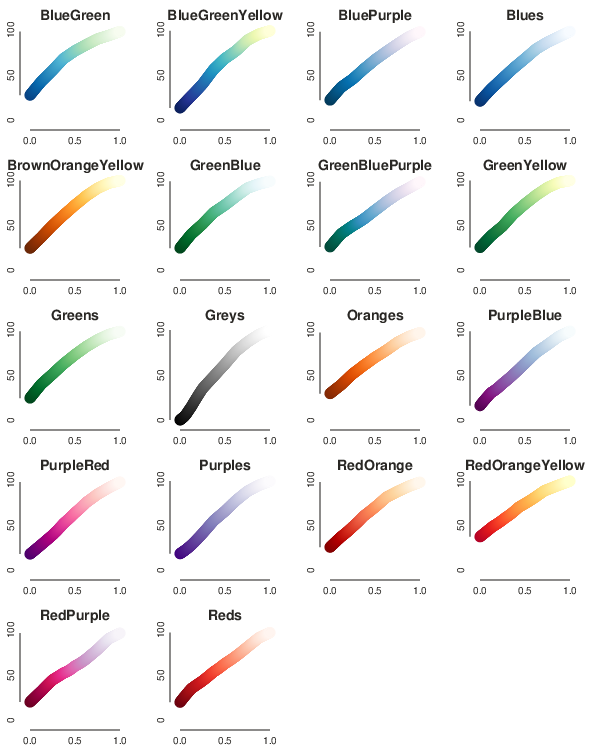

In [38]:
import toyplot.docs
toyplot.docs.plot_luma(toyplot.color.brewer.maps("sequential"))

Note that for each of the maps, the relationship between data and luminance is close to linear (the ideal).  Similarly, here are the other linear color maps provided by Toyplot, which provide nearly perfect luminance:

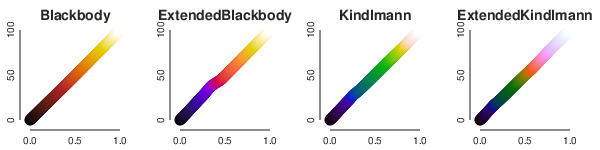

In [39]:
toyplot.docs.plot_luma(toyplot.color.linear.maps())

Finally, here are the Color Brewer diverging colormaps which, once again, are close to linear, while providing a crisp transition between positive and negative slopes:

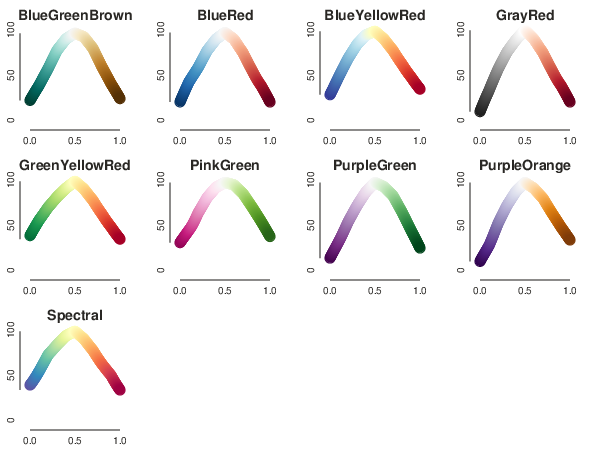

In [40]:
toyplot.docs.plot_luma(toyplot.color.brewer.maps("diverging"))

In most situations, the preceding colormaps should be ideal.  However, there are some circumstances where you will need to account for more than just luminance.  In particular, some data may trigger an optical illusion called "Mach Bands" that can exaggerate contrasts in color.  In this case, the Moreland diverging color maps may be a good choice:

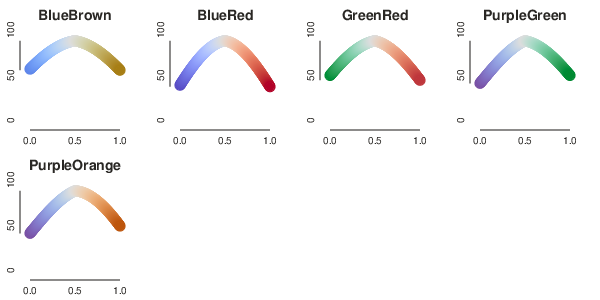

In [41]:
toyplot.docs.plot_luma(toyplot.color.diverging.maps())

Although the diverging colormaps use a much narrower range of available luminance that *isn't* linear, they provide a perceptually uniform mapping that takes both color and luminance into account to eliminate Mach banding effects.

When we say that a palettes and colormaps in Toyplot are "high quality", this is what we mean - they provide perceptually uniform relationships between data and color, so that viewers can intuitively relate changes in color to changes in magnitude for the underyling data.

As a counterexample, here is a low-quality colormap (mis)used by many mainstream visualization libraries: 

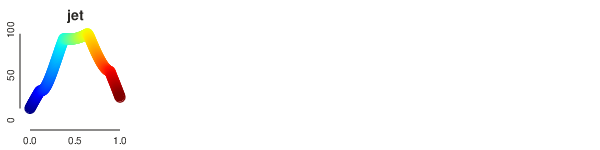

In [42]:
import numpy
jet = toyplot.color.Palette(numpy.load("jet.npy"))
toyplot.docs.plot_luma("jet", jet)

Note that this palette provides a complex, nonlinear luminance profile that makes it a poor choice no matter what type of data you wish to display, sequential *or* diverging!

Now that you are familiar with palettes and colormaps, see :ref:`color-mapping` to see how they are used to display data in a plot.